In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score
import pandas as pd
from sklearn.metrics import roc_curve, auc, precision_recall_curve, cohen_kappa_score
from sklearn import metrics
pd.set_option('display.max_columns', None)

df= pd.read_csv('PS_20174392719_1491204439457_log.csv')

In [11]:
y = df.isFraud
X = df.drop('isFraud', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

# DummyClassifier to predict only target 0
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

# checking unique labels
print('Unique predicted labels: ', (np.unique(dummy_pred)))

# checking accuracy
print('Test score: ', accuracy_score(y_test, dummy_pred))


Unique predicted labels:  [0]
Test score:  0.9986904765646856


In [14]:
print("Test data")
print("#####################")
print("F1: ", metrics.f1_score(y_test, dummy_pred))
print("Cohen Kappa: ", metrics.cohen_kappa_score(y_test, dummy_pred))
print("Brier: ", metrics.brier_score_loss(y_test, dummy_pred))
print(metrics.classification_report(y_test, dummy_pred))
conf_matrix = metrics.confusion_matrix(y_test, dummy_pred)

Test data
#####################


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


F1:  0.0
Cohen Kappa:  0.0
Brier:  0.001309523435314383


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588572
           1       0.00      0.00      0.00      2083

   micro avg       1.00      1.00      1.00   1590655
   macro avg       0.50      0.50      0.50   1590655
weighted avg       1.00      1.00      1.00   1590655



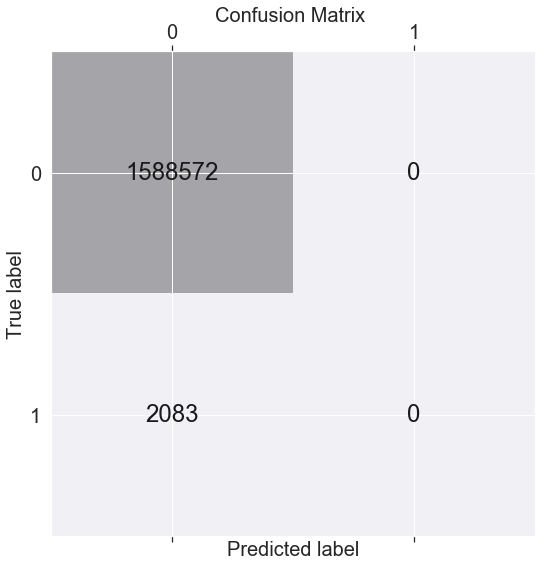

In [15]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(conf_matrix, alpha=0.3,cmap=plt.cm.gray_r)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', fontsize=24,color ='k')
plt.title('Confusion Matrix ', size=20)
plt.xlabel('Predicted label', size=20)
plt.ylabel('True label', size=20)
ax.tick_params('x', labelsize = 20)
ax.tick_params('y', labelsize = 20)
plt.tight_layout()

In [23]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')